
# Problem set 5: Solow Model

**What you’ll practice**
- Writing small, testable functions.  
- Plotting steady states and transition dynamics.  
- Building a widget-based slider plot for the steady state figure.  
- Extending the **simulator** from lecture 9 to incorporate growth in technology and population.



In [1]:

# Convenience setup (safe to run)
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from types import SimpleNamespace


**Table of contents**<a id='toc0_'></a>    
- 1. [Recap: Baseline Solow (no growth)](#toc1_)    
- 2. [Add technology growth \(g\)](#toc2_)    
  - 2.1. [Compute steady-state Capital](#toc2_1_)    
  - 2.2. [Plot the steady-state diagram with technology growth ($g>0$, $n=0$)](#toc2_2_)    
- 3. [Add **population growth** ($n>0$) with **technology growth** fixed at $g>0$](#toc3_)    
  - 3.1. [Implement the steady-state function with $g>0$ and $n\ge 0$](#toc3_1_)    
  - 3.2. [Plot the steady state diagram with population growth](#toc3_2_)    
- 4. [Static steady-state comparison](#toc4_)    
- 5. [Simulator with \(g\) and \(n\)](#toc5_)    
  - 5.1. [Extend the Simulator](#toc5_1_)    
  - 5.2. [Halving population growth under $g>0$](#toc5_2_)    
  - 5.3. [Savings rate rises by 20%](#toc5_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


## 1. <a id='toc1_'></a>[Recap: Baseline Solow (no growth)](#toc0_)

We work with Cobb–Douglas production in intensive form:
$ y = f(k) = k^{\alpha}, \qquad 0<\alpha<1. $

Law of motion for capital per worker (no growth):
$ k_{t+1} = s f(k_t) + (1-\delta)k_t. $
Steady state solves
$ s k^{\alpha} = \delta k. $


In [2]:
# === Baseline parameters (edit these for experiments) ===
params = {
    'alpha': 0.33,   # capital share
    's':     0.25,   # savings rate
    'delta': 0.06,   # depreciation
}

params

{'alpha': 0.33, 's': 0.25, 'delta': 0.06}

In [3]:
# === Core functions for the Solow model (per worker) ===

def f(k, alpha):
    return np.power(k, alpha)

def fprime(k, alpha):
    return alpha * np.power(k, alpha-1)

def k_star_no_growth(alpha, s, delta):
    return np.power(s / delta, 1.0 / (1.0 - alpha))


# quick test
print("k* (no growth), alpha=1/3, s=0.2, delta=0.08 ->", k_star_no_growth(1/3, 0.2, 0.08))


k* (no growth), alpha=1/3, s=0.2, delta=0.08 -> 3.952847075210473


In [4]:
import runpy # 
_ = runpy.run_module("A1", run_name="__main__");  # no big dict printed

k* (no growth), alpha=1/3, s=0.2, delta=0.08 -> 3.952847075210473



## 2. <a id='toc2_'></a>[Add technology growth \(g\)](#toc0_)

Let technology grow at gross rate \(1+g\) so that \(A_{t+1}=(1+g)A_t\). Define variables **per effective worker**:
$ k \equiv \frac{K}{AL}, \qquad y \equiv \frac{Y}{AL}. $

The discrete-time law of motion becomes
$
k_{t+1} \;=\; \frac{s f(k_t) + (1-\delta)k_t}{1+g}.
$
The steady state \(k^*\) solves
$
s f(k^*) \;=\; \underbrace{\big[(1+g) - (1-\delta)\big]}_{\displaystyle \delta + g}\, k^*.
$

For Cobb–Douglas $f(k)=k^\alpha$, $k^* = \left(\frac{s}{\delta + g}\right)^{\tfrac{1}{1-\alpha}}$.


### 2.1. <a id='toc2_1_'></a>[Compute steady-state Capital](#toc0_)

**Task:** Define a function `k_star_with_g(alpha, s, delta, g)` that computes the steady state capital  per-effective-worker cwith technology growth g (n=0). Print the chosen parameter values and the resulting $k^*$.

In [5]:
import runpy # 
_ = runpy.run_module("A2_1", run_name="__main__");  # no big dict printed

k* (g>0), alpha=1/3, s=0.2, delta=0.08, g=0.02 -> 2.82842712474619


### 2.2. <a id='toc2_2_'></a>[Plot the steady-state diagram with technology growth ($g>0$, $n=0$)](#toc0_)

**Task.** Plot the Solow steady state **per effective worker** when technology grows at rate $g$ (population fixed). Show the two curves on one figure and mark $k^*$.

**Theory recap**
- Intensive production: $f(k)=k^{\alpha}$, with $0<\alpha<1$.
- Law of motion (per effective worker): $k_{t+1}=\dfrac{s f(k_t)+(1-\delta)k_t}{1+g}$.
- Break-even line: $(\delta+g)\,k$.

k* (g>0), alpha=1/3, s=0.2, delta=0.08, g=0.02 -> 2.82842712474619
k* (no growth), alpha=1/3, s=0.2, delta=0.08 -> 3.952847075210473


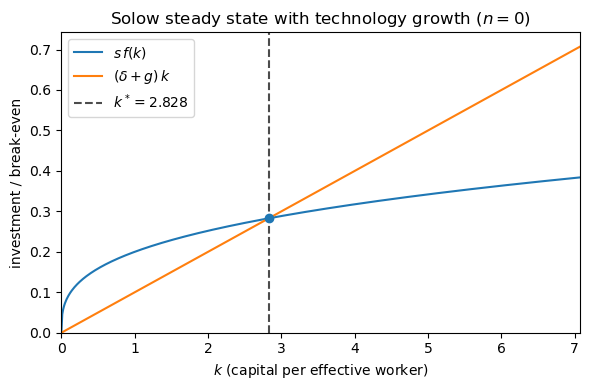

Parameters: alpha=0.333, s=0.200, delta=0.080, g=0.020
Steady state: k* = 2.828427


In [6]:
import runpy # 
_ = runpy.run_module("A2_2", run_name="__main__");  # no big dict printed

## 3. <a id='toc3_'></a>[Add **population growth** ($n>0$) with **technology growth** fixed at $g>0$](#toc0_)

We now allow population to grow at rate $n$ while technology continues to grow at rate $g>0$.

**Theory (per effective worker)**  
- Law of motion: 
  $
  k_{t+1}=\frac{s\,f(k_t)+(1-\delta)k_t}{(1+g)(1+n)},\qquad f(k)=k^\alpha,\; 0<\alpha<1.
  $
- Break-even line: 
  $
  \big[(1+g)(1+n)-(1-\delta)\big]\,k=(\delta+g+n+gn)\,k.
  $
- Steady state:
  $
  k^*(g,n)=\left(\frac{s}{\delta+g+n+gn}\right)^{\tfrac{1}{1-\alpha}}.
  $

### 3.1. <a id='toc3_1_'></a>[Implement the steady-state function with $g>0$ and $n\ge 0$](#toc0_)

- Create `k_star_gn(alpha, s, delta, g, n)` that returns $k^*(g,n)$ per effective worker.  
- Keep $g>0$ throughout this exercise.

In [7]:
import runpy # 
_ = runpy.run_module("A3_1", run_name="__main__");  # no big dict printed

k* (g,n), alpha=1/3, s=0.2, delta=0.08, g=0.02, n=0.01 -> 2.4449647477966994


### 3.2. <a id='toc3_2_'></a>[Plot the steady state diagram with population growth](#toc0_)

Redo the steady-state figure per effective worker with a positive population-growth rate.

k* (g,n), alpha=1/3, s=0.2, delta=0.08, g=0.02, n=0.01 -> 2.4449647477966994


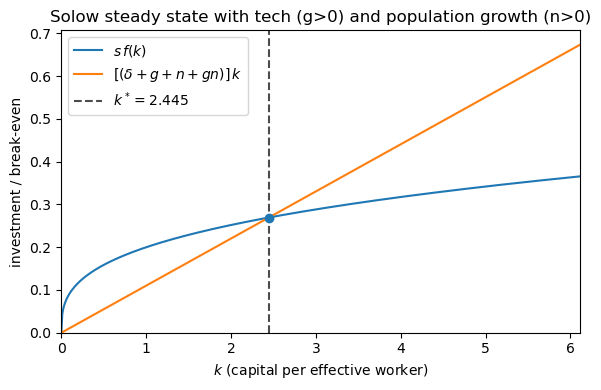

Parameters: alpha=0.333, s=0.200, delta=0.080, g=0.020, n=0.010
Steady state: k* = 2.444965


In [8]:
import runpy # 
_ = runpy.run_module("A3_2", run_name="__main__");  # no big dict printed

## 4. <a id='toc4_'></a>[Static steady-state comparison](#toc0_)

**Goal.** For a fixed parameter set, compare the Solow steady-state diagram **without growth**, **with technology growth** ($g>0$, $n=0$), and **with technology + population growth** ($g>0$, $n>0$).

**Do:**
1. Implement the three steady-state formulas  
   - no growth:  $k^*=\left(\dfrac{s}{\delta}\right)^{\tfrac{1}{1-\alpha}}$  
   - tech only:  $k^*=\left(\dfrac{s}{\delta+g}\right)^{\tfrac{1}{1-\alpha}}$  
   - tech+pop:   $k^*=\left(\dfrac{s}{(1+g)(1+n)-(1-\delta)}\right)^{\tfrac{1}{1-\alpha}}$  
2. In one figure with **three subplots**, draw for each case:  
   the curve $s f(k)$ with $f(k)=k^\alpha$, the relevant break-even line, and a dashed vertical line at $k^*$.
3. Use a **shared x-axis** across panels (pick a single $k_{\max}$ based on the largest $k^*$) so students can visually compare levels.

**Deliverable:** a single PNG or embedded figure with the three panels.


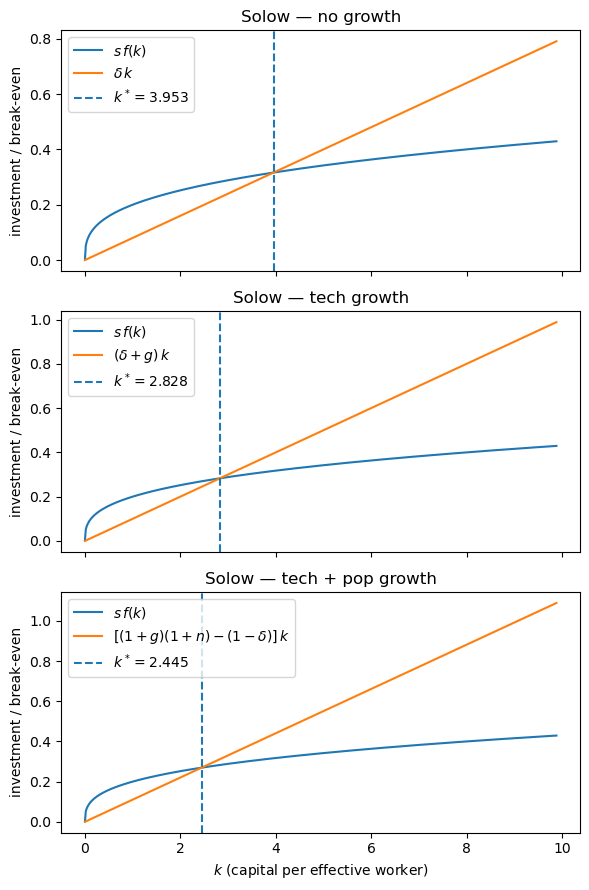

k* no growth = 3.952847,  k* tech = 2.828427,  k* tech+pop = 2.444965


In [20]:
import runpy # 
_ = runpy.run_module("A4", run_name="__main__");  # no big dict printed

_Note: Discuss the differences._


## 5. <a id='toc5_'></a>[Simulator with \(g\) and \(n\)](#toc0_)

Extend the lecture’s simulator to track levels $K_t, Y_t, A_t, L_t$, per worker, and per effective worker.

Assume exogenous sequences:
$
A_{t+1}=(1+g)A_t, \qquad L_{t+1}=(1+n)L_t.
$
Aggregate capital evolves as
$
K_{t+1} = s Y_t + (1-\delta)K_t, \qquad Y_t = K_t^{\alpha}(A_t L_t)^{1-\alpha}.
$


### 5.1. <a id='toc5_1_'></a>[Extend the Simulator](#toc0_)
Functions to implement:
- `simulate_solow(T, K0, A0, L0, alpha, s, delta, g, n)` - modify the function from the lecture to return a dict with arrays for `K, A, L, Y, k=K/(AL), y=Y/(AL), k_per_worker=K/L, y_per_worker=Y/L`.

Use the skeleton below as a starting point.


In [10]:
from typing import Callable, Union

ArrayLike = Union[float, np.ndarray, Callable[[int, float], float]]

def f(k: float, alpha: float) -> float:
    return k**alpha

def simulate_solow(
    k0: float,
    T: int,
    alpha: float = 1/3,
    s: ArrayLike = 0.20,
    delta: ArrayLike = 0.08,
):
    k = np.empty(T+1); y = np.empty(T+1); c = np.empty(T+1)
    s_used = np.empty(T+1); d_used = np.empty(T+1)
    k[0] = float(k0)

    def val_at(x, t, k_t):
        if callable(x): return float(x(t, k_t))
        if np.ndim(x) == 0: return float(x)
        return float(x[t])

    for t in range(T):
        s_used[t] = val_at(s, t, k[t])
        d_used[t] = val_at(delta, t, k[t])
        y[t] = f(k[t], alpha)
        c[t] = (1 - s_used[t]) * y[t]
        k[t+1] = s_used[t] * y[t] + (1 - d_used[t]) * k[t]

    # last-period accounting
    s_used[-1] = val_at(s, T, k[-1])
    d_used[-1] = val_at(delta, T, k[-1])
    y[-1] = f(k[-1], alpha)
    c[-1] = (1 - s_used[-1]) * y[-1]

    return {"k": k, "y": y, "c": c, "s_path": s_used, "delta_path": d_used}



In [11]:
import runpy # 
_ = runpy.run_module("A5_1", run_name="__main__");  # no big dict printed

K len: 51
A len: 51
L len: 51
Y len: 51
k_eff len: 51
k_per_worker len: 51


### 5.2. <a id='toc5_2_'></a>[Halving population growth under $g>0$](#toc0_)

**Goal.** With your growth‐enabled simulator, study a case where population growth **halves** at time $t_{\text{switch}}$ and plot transitions of **capital per effective worker** $k_t$ and **consumption per effective worker** $c_t$.

**Do:**
1. Build $n_t$ of length $T{+}1$: $n_t=n_0$ for $t<t_{\text{switch}}$, $n_t=\tfrac{1}{2}n_0$ for $t\ge t_{\text{switch}}$.
2. Run **baseline** with constant $n_0$ and the **case** with your $n_t$; keep $g>0$ fixed and all other params identical.
3. From each run compute $k_t=K_t/(A_tL_t)$ and $c_t=C_t/(A_tL_t)$, where $C_t=(1-s_t)Y_t$.
4. Plot two lines (baseline vs. scenario) for $k_t$ and for $c_t$; add a vertical dashed line at $t_{\text{switch}}$.

**Hints (relative to version without $g,n$):**
- Update **levels** each step: $K_{t+1}=s_tY_t+(1-\delta_t)K_t$, $A_{t+1}=(1+g_t)A_t$, $L_{t+1}=(1+n_t)L_t$, $Y_t=K_t^\alpha(A_tL_t)^{1-\alpha}$.
- Then form per-effective-worker variables by dividing by $A_tL_t$.
- Ensure arrays are length $T{+}1$ and compute $Y_T,C_T$ at the end.

**Deliverables:** Two figures ($k_t$ and $c_t$ per effective worker) comparing baseline vs. halved $n$, clearly marking $t_{\text{switch}}$.


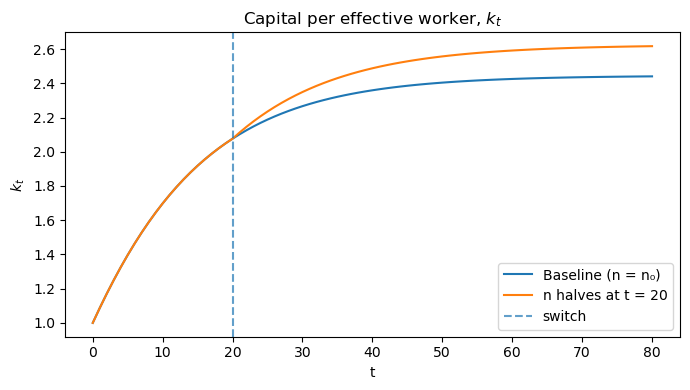

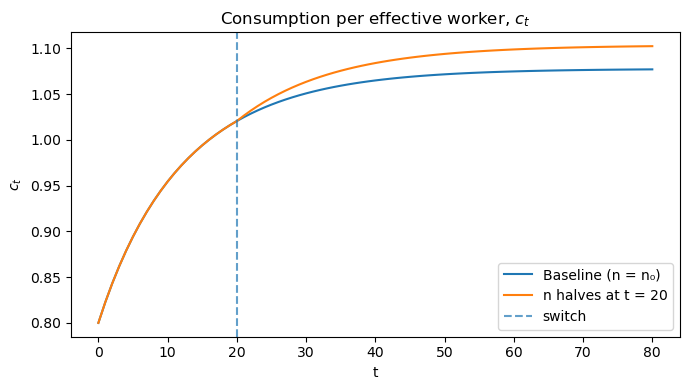

In [12]:
import runpy # 
_ = runpy.run_module("A5_2", run_name="__main__");  # no big dict printed

### 5.3. <a id='toc5_3_'></a>[Savings rate rises by 20%](#toc0_)

**Goal.** Use your growth-adjusted simulator to study a **permanent 20% increase** in the savings rate at time $t_{\text{switch}}$. Compare **capital per effective worker** $k_t$ and **consumption per effective worker** $c_t$ to a baseline with constant $s$.

**Do:**
1. Build an $s_t$ path (length $T{+}1$): $s_t=s_0$ for $t<t_{\text{switch}}$, $s_t=1.2\,s_0$ for $t\ge t_{\text{switch}}$ (clip so $s_t<1$).
2. Run two simulations with identical $(\alpha,\delta,g,n)$ and initial $(K_0,A_0,L_0)$:
   - **Baseline:** constant $s_0$.
   - **Policy:** piecewise $s_t$ from step 1.
3. Compute $k_t = K_t/(A_t L_t)$ and $c_t = C_t/(A_t L_t)$ for both runs.
4. Plot transitions (two lines each) and mark $t_{\text{switch}}$ with a dashed vertical line.

**Hints:** Reuse your simulator’s flexibility for time-varying arrays; ensure arrays are length $T{+}1$ and compute $Y_T,C_T$ at the end as in the baseline version.


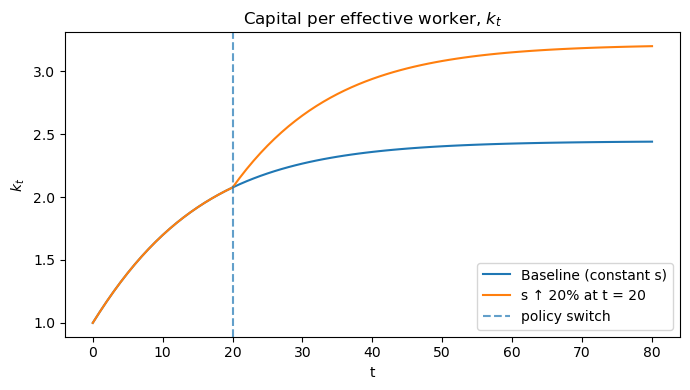

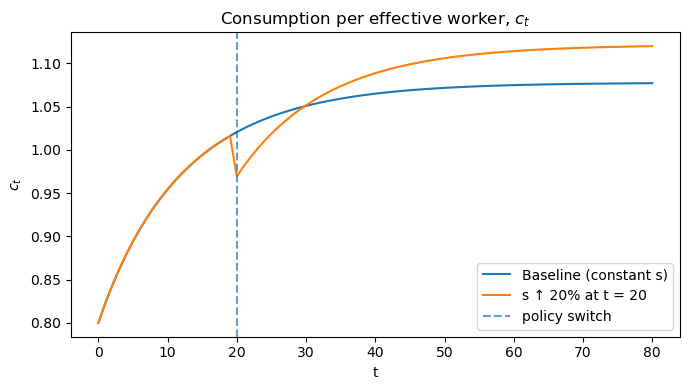

In [13]:
import runpy # 
_ = runpy.run_module("A5_3", run_name="__main__");  # no big dict printed